# Общая информация
__Цель:__ сравнить качество генерируемых ответов на категории __API Usage__

__Задачи:__

1) Сравнить метрики для base и tuned модели на promt с title

2) Сравнить метрики tuned моделей с разлиными promt

3) Посмотреть распределение длин генерируемых ответов

4) Сделать выводы

In [2]:
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns


warnings.filterwarnings("ignore")


warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", None)

In [3]:
def add_answers_length(df):
    df['len_of_generated_answer'] = df.generated_answer.apply(lambda x: len(x.split(" ")))
    
    df['len_of_original_answer'] = df.original_answer.apply(lambda x: len(x.split(" ")))
    
    return df

In [4]:
def get_metrics(df, df_diff, df1_name, df2_name, print_1=True, print_2=True):
    bert_f1 = df.bert_f1.mean()
    rouge_score = df.rouge_score.mean()
    bleu_score = df.bleu_score.mean()

    t_bert_f1 = df_diff.bert_f1.mean()
    t_rouge_score = df_diff.rouge_score.mean()
    t_bleu_score = df_diff.bleu_score.mean()

    if print_1:
        print(
            f"BERT score {df1_name}: {round(bert_f1, 5)}",
            f"ROUGE score {df1_name}: {round(rouge_score, 5)}",
            f"Unigram BLEU score {df1_name}: {round(bleu_score, 5)}",
            sep="\n",
        )

        print()

    if print_2:

        print(
            f"BERT score {df2_name}: {round(t_bert_f1, 5)}",
            f"ROUGE score {df2_name}: {round(t_rouge_score, 5)}",
            f"Unigram BLEU score {df2_name}: {round(t_bleu_score, 5)}",
            sep="\n",
        )

        print()

    print(
        f"BERT score diff: {t_bert_f1 - bert_f1} ({round((t_bert_f1 - bert_f1)/bert_f1*100, 2)} %)",
        f"ROUGE score diff: {t_rouge_score - rouge_score} ({round((t_rouge_score - rouge_score)/rouge_score*100, 2)} %)",
        f"Unigram BLEU score diff: {t_bleu_score - bleu_score} ({round((t_bleu_score - bleu_score)/bleu_score*100, 2)} %)",
        sep="\n",
    )

    return {
        df1_name: {
            "bert": bert_f1,
            "rouge": rouge_score,
            "bleu": bleu_score,
        },
        df2_name: {
            "bert": t_bert_f1,
            "rouge": t_rouge_score,
            "bleu": t_bleu_score,
        },
    }

# Фиксация сидов

In [5]:
#torch.manual_seed(42)
np.random.seed(42)

# Загрузка таблиц

In [19]:
tuned_android_api_usage_200_title_only = pd.read_csv(
    r"D:\vkr\Notebooks\Analys\artifacts\tuning_question_title_combination\title_only.csv"
)

tuned_android_api_usage_200_question_only = pd.read_csv(
    r"D:\vkr\Notebooks\Analys\artifacts\tuning_question_title_combination\question_only.csv"
)

tuned_android_api_usage_200_title_question = pd.read_csv(
    r"D:\vkr\Notebooks\Analys\artifacts\tuning_question_title_combination\title_question.csv"
)

# Анализ результатов

## Изучение семплов

In [20]:
import random

In [21]:
random_idx = random.randrange(0, len(tuned_android_api_usage_200_title_question))

In [22]:
pd.DataFrame(tuned_android_api_usage_200_question_only.iloc[random_idx])

,3
title,Exception raised during rendering: java.lang.System.arraycopy[CI[CIIV Exception details are logged in Window > Show View > Error Log
question,I can't find any other android API in the project. it is showing only API 20 Android 4.4W. how do i overcome from it?
generated_answer,"You can use the same API level as your project is targeting. If you are targeting API 21, you can just use API 19."
original_answer,"The issue is because you are using the API level 20 for wearable devices. You need to download other sdk through the Android SDK Manager.In Eclipse, open windows->android sdk manager->select Android 4.4.2 and check Android sdk and ARM system image and click install packagesNow you have the API level 19 source code so eclipse will now be able to render the viewsNow go to the graphical layout tab of the layout and change the android version from 20 to 19."
bert_precision,0.876107
bert_recall,0.825921
bert_f1,0.850274
rouge_score,0.146789
bleu_score,0.245614


In [23]:
pd.DataFrame(tuned_android_api_usage_200_title_only.iloc[random_idx])

,3
title,Exception raised during rendering: java.lang.System.arraycopy[CI[CIIV Exception details are logged in Window > Show View > Error Log
question,I can't find any other android API in the project. it is showing only API 20 Android 4.4W. how do i overcome from it?
generated_answer,"I'm not sure what you mean by ""I don't know how to fix it"". I'm assuming that you are trying to copy a list of objects to a new list. If that's the case, you can't do that. You can only copy an array."
original_answer,"The issue is because you are using the API level 20 for wearable devices. You need to download other sdk through the Android SDK Manager.In Eclipse, open windows->android sdk manager->select Android 4.4.2 and check Android sdk and ARM system image and click install packagesNow you have the API level 19 source code so eclipse will now be able to render the viewsNow go to the graphical layout tab of the layout and change the android version from 20 to 19."
bert_precision,0.843471
bert_recall,0.811488
bert_f1,0.82717
rouge_score,0.089552
bleu_score,0.13


In [24]:
pd.DataFrame(tuned_android_api_usage_200_title_question.iloc[random_idx])

,3
title,Exception raised during rendering: java.lang.System.arraycopy[CI[CIIV Exception details are logged in Window > Show View > Error Log
question,I can't find any other android API in the project. it is showing only API 20 Android 4.4W. how do i overcome from it?
generated_answer,You can use the android.support.v7.app.Application class to get the Application class.
original_answer,"The issue is because you are using the API level 20 for wearable devices. You need to download other sdk through the Android SDK Manager.In Eclipse, open windows->android sdk manager->select Android 4.4.2 and check Android sdk and ARM system image and click install packagesNow you have the API level 19 source code so eclipse will now be able to render the viewsNow go to the graphical layout tab of the layout and change the android version from 20 to 19."
bert_precision,0.872314
bert_recall,0.829608
bert_f1,0.850425
rouge_score,0.1
bleu_score,0.232558


## Анализ длины текстовых данных

In [25]:
tuned_android_api_usage_200_title_only = add_answers_length(tuned_android_api_usage_200_title_only)
tuned_android_api_usage_200_question_only = add_answers_length(tuned_android_api_usage_200_question_only)
tuned_android_api_usage_200_title_question = add_answers_length(tuned_android_api_usage_200_title_question)

In [26]:
tuned_android_api_usage_200_title_only.describe()

,bert_precision,bert_recall,bert_f1,rouge_score,bleu_score,len_of_generated_answer,len_of_original_answer
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.870517,0.834624,0.851956,0.127329,0.210011,26.018692,73.177570
std,0.022598,0.024905,0.019324,0.057854,0.090996,16.496415,69.651127
min,0.764833,0.773745,0.805336,0.000000,0.047893,8.000000,3.000000
25%,0.857204,0.818962,0.839510,0.087923,0.135581,13.500000,30.000000
50%,0.872487,0.835257,0.851574,0.121212,0.196581,22.000000,54.000000
75%,0.885365,0.850952,0.866291,0.158493,0.277637,33.000000,90.500000
max,0.920784,0.891996,0.906162,0.297872,0.485714,96.000000,409.000000


In [27]:
tuned_android_api_usage_200_question_only.describe()

,bert_precision,bert_recall,bert_f1,rouge_score,bleu_score,len_of_generated_answer,len_of_original_answer
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.871082,0.837849,0.853953,0.140009,0.188240,26.822430,73.177570
std,0.015655,0.024947,0.016805,0.062396,0.080270,12.715919,69.651127
min,0.830856,0.786797,0.819945,0.037037,0.073248,7.000000,3.000000
25%,0.859667,0.821225,0.840840,0.100505,0.134773,17.000000,30.000000
50%,0.868962,0.833377,0.852783,0.136170,0.168317,24.000000,54.000000
75%,0.882196,0.852825,0.863304,0.179167,0.227553,36.000000,90.500000
max,0.911748,0.899035,0.901864,0.482759,0.500000,66.000000,409.000000


In [28]:
tuned_android_api_usage_200_title_question.describe()

,bert_precision,bert_recall,bert_f1,rouge_score,bleu_score,len_of_generated_answer,len_of_original_answer
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.874330,0.837787,0.855484,0.132375,0.205570,24.158879,73.177570
std,0.017362,0.026546,0.018954,0.056061,0.083786,11.758698,69.651127
min,0.831793,0.775650,0.808688,0.000000,0.077844,8.000000,3.000000
25%,0.864095,0.823206,0.844017,0.097800,0.143268,13.500000,30.000000
50%,0.872178,0.837646,0.855603,0.128440,0.190909,22.000000,54.000000
75%,0.886802,0.854874,0.867439,0.156869,0.244572,31.000000,90.500000
max,0.913225,0.909587,0.911402,0.378378,0.523810,59.000000,409.000000


#### Boxplot длин текстовых данных

In [29]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Box(y=tuned_android_api_usage_200_title_only.len_of_generated_answer, name="Title only"), row=1, col=1
)

fig.add_trace(
    go.Box(y=tuned_android_api_usage_200_question_only.len_of_generated_answer, name="Question only"), row=1, col=1
)

fig.add_trace(
    go.Box(y=tuned_android_api_usage_200_title_question.len_of_generated_answer, name="Title and question"), row=1, col=1
)

fig.update_layout(
    height=600, width=1000, title_text="Length boxplot", yaxis_title="Legnth"
)
fig.update_traces(boxpoints="all", jitter=0.3)
fig.show()

### Анализ метрик

In [33]:
base_tuned_metrics = get_metrics(tuned_android_api_usage_200_question_only, tuned_android_api_usage_200_title_only, '(Question only)', '(Title only)')

BERT score (Question only): 0.85395
ROUGE score (Question only): 0.14001
Unigram BLEU score (Question only): 0.18824

BERT score (Title only): 0.85196
ROUGE score (Title only): 0.12733
Unigram BLEU score (Title only): 0.21001

BERT score diff: -0.001997644099119622 (-0.23 %)
ROUGE score diff: -0.012680517789040002 (-9.06 %)
Unigram BLEU score diff: 0.021771017870927528 (11.57 %)


In [34]:
base_tuned_metrics = get_metrics(tuned_android_api_usage_200_question_only, tuned_android_api_usage_200_title_question, '(Question only)', '(Title question)')

BERT score (Question only): 0.85395
ROUGE score (Question only): 0.14001
Unigram BLEU score (Question only): 0.18824

BERT score (Title question): 0.85548
ROUGE score (Title question): 0.13237
Unigram BLEU score (Title question): 0.20557

BERT score diff: 0.0015312132434310843 (0.18 %)
ROUGE score diff: -0.007634412576616317 (-5.45 %)
Unigram BLEU score diff: 0.017330585092124928 (9.21 %)


### Метрики на одном полотне

In [35]:
def get_metric_table():
    metric_df = pd.DataFrame(
        {
            "BERT_F1": [
                tuned_android_api_usage_200_question_only[f"bert_f1"].mean(),
                tuned_android_api_usage_200_title_only[f"bert_f1"].mean(),
                tuned_android_api_usage_200_title_question[f"bert_f1"].mean(),
            ],
            "ROUGE": [
                tuned_android_api_usage_200_question_only[f"rouge_score"].mean(),
                tuned_android_api_usage_200_title_only[f"rouge_score"].mean(),
                tuned_android_api_usage_200_title_question[f"rouge_score"].mean(),
            ],
            "BLEU": [
                tuned_android_api_usage_200_question_only[f"bleu_score"].mean(),
                tuned_android_api_usage_200_title_only[f"bleu_score"].mean(),
                tuned_android_api_usage_200_title_question[f"bleu_score"].mean(),
            ],
        },
        index=[
            "Question only",
            'Title only',
            'Title question',
        ],
    )
    return metric_df

[]

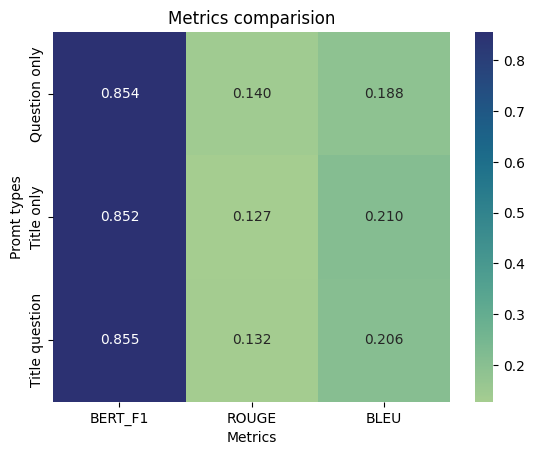

In [36]:
metrics_df = get_metric_table()
ax = sns.heatmap(metrics_df, annot=True, fmt='.3f', cmap="crest")
ax.set(xlabel="Metrics", ylabel="Promt types", title='Metrics comparision')
ax.plot()